# Matplotlib

## Carga de librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/ordonez/Documents/UCASAL/notebooks/base_datos_2008.csv",nrows=100000)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               100000 non-null  int64  
 1   Month              100000 non-null  int64  
 2   DayofMonth         100000 non-null  int64  
 3   DayOfWeek          100000 non-null  int64  
 4   DepTime            98858 non-null   float64
 5   CRSDepTime         100000 non-null  int64  
 6   ArrTime            98698 non-null   float64
 7   CRSArrTime         100000 non-null  int64  
 8   UniqueCarrier      100000 non-null  object 
 9   FlightNum          100000 non-null  int64  
 10  TailNum            98858 non-null   object 
 11  ActualElapsedTime  98698 non-null   float64
 12  CRSElapsedTime     100000 non-null  int64  
 13  AirTime            98698 non-null   float64
 14  ArrDelay           98698 non-null   float64
 15  DepDelay           98858 non-null   float64
 16  Ori

## Gráfigo Pie

In [4]:
data = np.unique(df.Cancelled, return_counts=True)

In [5]:
data

(array([0, 1], dtype=int64), array([98858,  1142], dtype=int64))

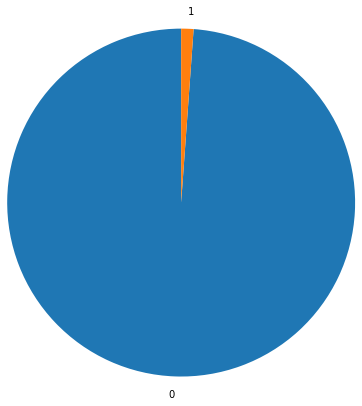

In [6]:
plt.pie(x=data[1],
       labels=data[0],
       startangle=90,
       radius=2)
plt.show()

## Modificar elementos del gráfico en Matplotlib

In [7]:
np.random.seed(0)
df = pd.read_csv("C:/Users/ordonez/Documents/UCASAL/notebooks/base_datos_2008.csv",nrows=1000000)
df = df.sample(frac=1).head(100)

<b> Un diagrama de dispersión o gráfica de dispersión o gráfico de burbujas gráfico de bolas es un tipo de diagrama matemático que utiliza las coordenadas cartesianas para mostrar los valores de dos variables para un conjunto de datos.</b>

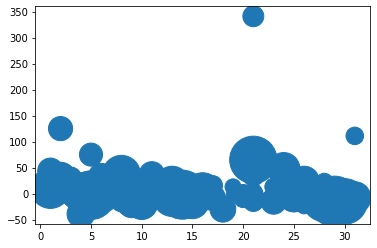

In [8]:
plt.scatter(x=df.DayofMonth, y=df.ArrDelay, s=df.Distance)

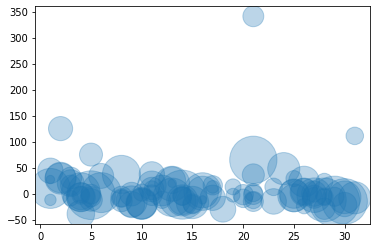

In [9]:
plt.scatter(x=df.DayofMonth, y=df.ArrDelay, s=df.Distance, alpha = .3)

Text(0, 0.5, 'Retraso al llegar')

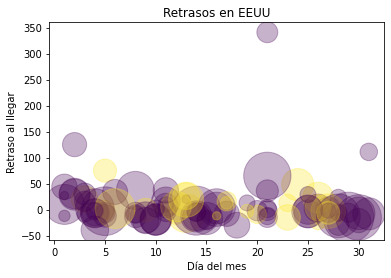

In [11]:
plt.scatter(x=df.DayofMonth, y=df.ArrDelay, s=df.Distance, alpha = .3, c = df.DayOfWeek.isin([6,7]))
plt.title("Retrasos en EEUU")
plt.xlabel("Día del mes")
plt.ylabel("Retraso al llegar")

(0.0, 150.0)

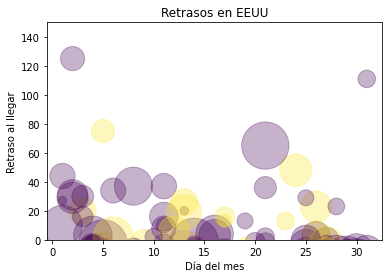

In [12]:
plt.scatter(x=df.DayofMonth, y=df.ArrDelay, s=df.Distance, alpha = .3, c = df.DayOfWeek.isin([6,7]))
plt.title("Retrasos en EEUU")
plt.xlabel("Día del mes")
plt.ylabel("Retraso al llegar")
plt.ylim([0,150])

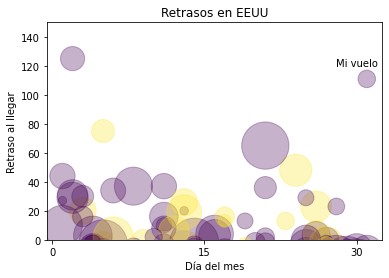

In [15]:
plt.scatter(x=df.DayofMonth, y=df.ArrDelay, s=df.Distance, alpha = .3, c = df.DayOfWeek.isin([6,7]))
plt.title("Retrasos en EEUU")
plt.xlabel("Día del mes")
plt.ylabel("Retraso al llegar")
plt.ylim([0,150])
plt.xticks([0,15,30])
plt.text(x=28,y=120,s="Mi vuelo")
plt.show()

## Etiquetas y leyendas en Matplotlib

In [17]:
df = pd.read_csv("C:/Users/ordonez/Documents/UCASAL/notebooks/base_datos_2008.csv",nrows=100000)
# El número de vuelo que se han salido cada día de la semana
data = np.unique(df.DayOfWeek, return_counts=True)
labs = ["Lun","Mar","Mir","Jue","Vie","Sab","Dom"]
data

(array([1, 2, 3, 4, 5, 6, 7], dtype=int64),
 array([14519, 14710, 14694, 17079, 14517, 11285, 13196], dtype=int64))

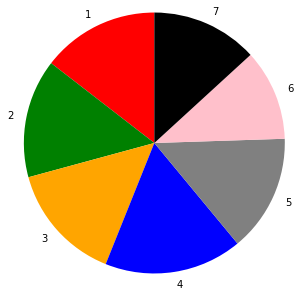

In [22]:
plt.pie(x = data[1],
       labels=data[0],
       radius=1.5,
       colors=["red","Green","Orange","Blue","Gray","Pink","Black"],
       startangle=90)
plt.show()

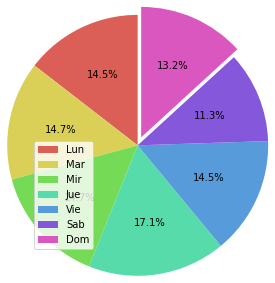

In [39]:
plt.pie(x = data[1],
       #labels=labs,
       radius=1.5,
       colors=sns.color_palette("hls",7),
        explode = (0,0,0,0,0,0,0.1),
       startangle=90,
       autopct="%1.1f%%")
plt.legend(loc="lower left",labels=labs)
plt.show()

[Text(0.5, 0, 'Día de la Semana'), Text(0, 0.5, 'Números de vuelos')]

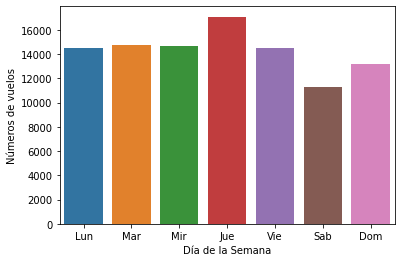

In [40]:
plt = sns.barplot(x=labs, y=data[1])
plt.set(xlabel="Día de la Semana", ylabel="Números de vuelos")

## Gráficos para series temporales

In [42]:
import datetime
import time
df = pd.read_csv("C:/Users/ordonez/Documents/UCASAL/notebooks/base_datos_2008.csv")
df2 = df[df['Origin'].isin(["ALT","HOU","IND"])]
df = df.head(500000)

In [43]:
len(df)

500000

In [46]:
times = [] #lista
for i in np.arange(len(df)):
    times.append(datetime.datetime(year=2008,month=df.loc[i,"Month"],day=df.loc[i,"DayofMonth"]))

In [50]:
times[50000] #devuelve año,mes,dia,hora,minutos

datetime.datetime(2008, 1, 18, 0, 0)

In [48]:
df["Time"]= times

In [51]:
data = df.groupby(by=["Time"],as_index=False)["DepDelay","ArrDelay"].mean()
data.head()

C:\Users\ordonez\AppData\Local\Temp\ipykernel_3700\2302406288.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = df.groupby(by=["Time"],as_index=False)["DepDelay","ArrDelay"].mean()


,Time,DepDelay,ArrDelay
0,2008-01-01,20.545599,20.999240
1,2008-01-02,23.324222,22.131194
2,2008-01-03,16.697759,14.479569
3,2008-01-04,14.058087,11.851733
4,2008-01-05,18.381555,17.138031


<AxesSubplot:xlabel='Time', ylabel='DepDelay'>

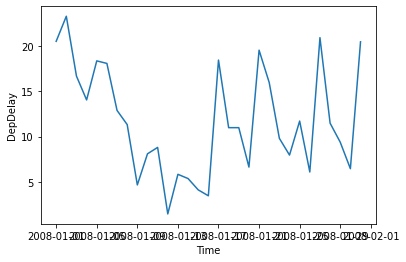

In [53]:
sns.lineplot(x=data["Time"],y=data["DepDelay"])

In [55]:
data = df.groupby(by=["Time"])["DepDelay","ArrDelay"].mean()
data.head()

C:\Users\ordonez\AppData\Local\Temp\ipykernel_3700\3499690146.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = df.groupby(by=["Time"])["DepDelay","ArrDelay"].mean()


,DepDelay,ArrDelay
Time,,
2008-01-01,20.545599,20.999240
2008-01-02,23.324222,22.131194
2008-01-03,16.697759,14.479569
2008-01-04,14.058087,11.851733
2008-01-05,18.381555,17.138031


<AxesSubplot:xlabel='Time'>

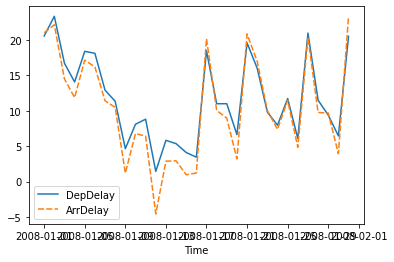

In [56]:
sns.lineplot(data=data)

In [58]:
times = []
for i in df2.index:
    times.append(datetime.datetime(year=2008,month=df2.loc[i,"Month"],day=df2.loc[i,"DayofMonth"]))
df2["Time"]=times

<AxesSubplot:xlabel='Time', ylabel='ArrDelay'>

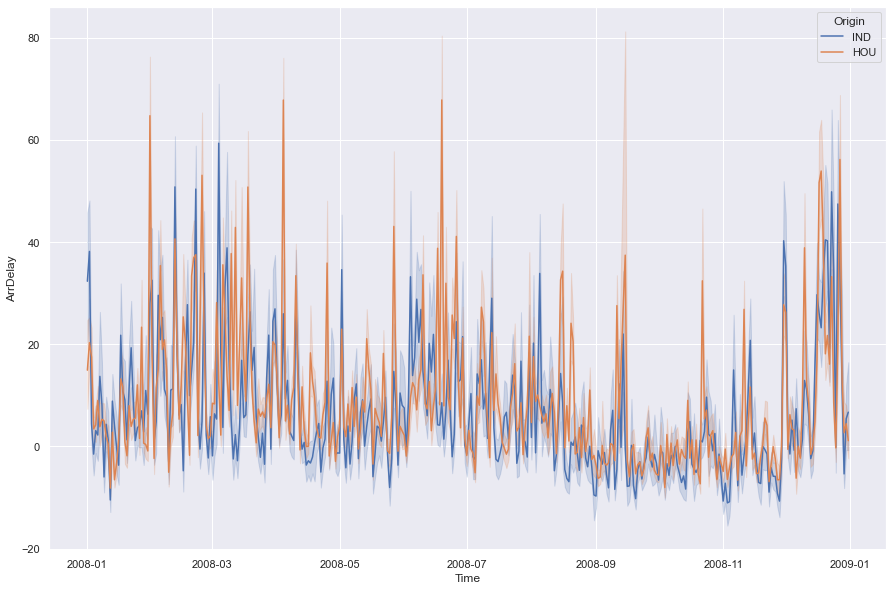

In [59]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="Time",y="ArrDelay",hue="Origin",data=df2)

## Histogramas y box plots en Matplotlib

In [2]:
df = pd.read_csv("C:/Users/ordonez/Documents/UCASAL/notebooks/base_datos_2008.csv")


In [3]:
#Eliminamos los datos faltantes
df.dropna(inplace=True, subset=["ArrDelay","DepDelay","Distance"])

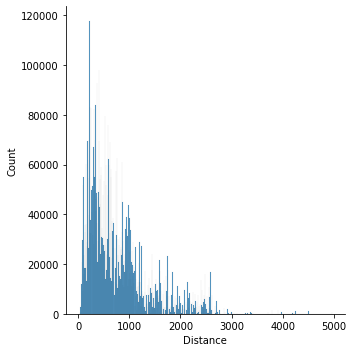

In [5]:
sns.displot(df["Distance"]) 

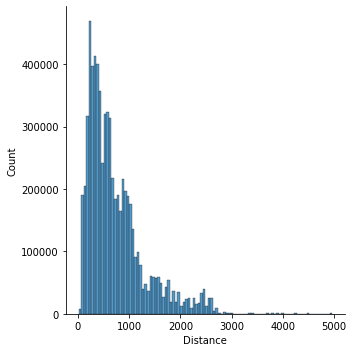

In [7]:
sns.displot(df["Distance"],bins=100)

(-300.0, 300.0)

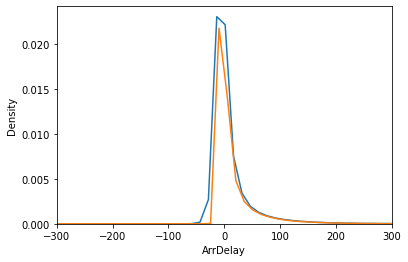

In [8]:
sns.kdeplot(df["ArrDelay"])
sns.kdeplot(df["DepDelay"])
plt.xlim([-300,300])

### Diagrama de caja

In [10]:
df2 = df[df["Origin"].isin(["ATL","HOU","IND"])].sample(frac=1).head(500)

<AxesSubplot:xlabel='DepDelay', ylabel='Origin'>

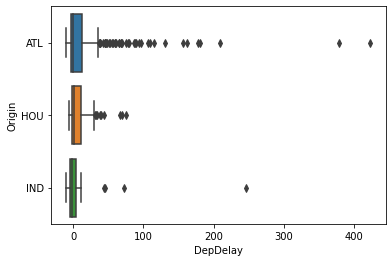

In [13]:
sns.boxplot(x="DepDelay",y="Origin",data=df2)

(-20.0, 150.0)

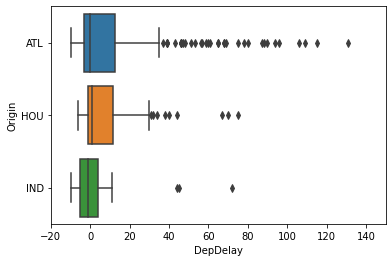

In [14]:
sns.boxplot(x="DepDelay",y="Origin",data=df2)
plt.xlim([-20,150])

## Nubes de puntos y gráficos de calor en Mapplotlib

In [17]:
df = pd.read_csv("C:/Users/ordonez/Documents/UCASAL/notebooks/base_datos_2008.csv")
df.dropna(inplace=True, subset=["ArrDelay","DepDelay","Distance","AirTime"])

In [18]:
sns.set(rc={'figure.figsize':(15,10)}) #Ajusta el tamaño del gráfico

In [19]:
df2 = df[df["Origin"].isin(["ATL","HOU","IND"])].sample(frac=1).head(1000)

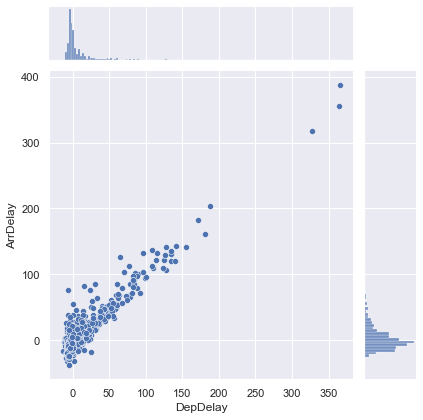

In [22]:
sns.jointplot(x=df2["DepDelay"],y=df2["ArrDelay"]) #en este caso se verá que están correlacionado

In [23]:
#Creamos un nuevo subset
df3 = df2[np.abs(df2["DepDelay"])<40] #los vuelos retrasados en la salida (departure)
df3 = df3[np.abs(df3["ArrDelay"])<40] #los vuelos retrasados en la llegada (arrival)

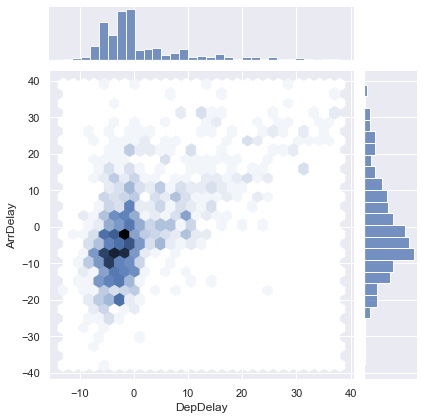

In [25]:
sns.jointplot(x=df3["DepDelay"],y=df3["ArrDelay"],kind="hex")
#A los costados mostrara la distribución univariada
#También mostrara una distribución conjunta

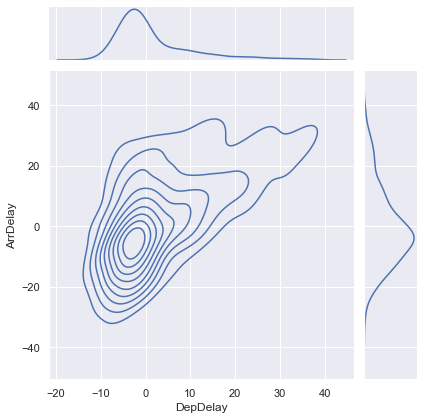

In [26]:
sns.jointplot(x=df3["DepDelay"],y=df3["ArrDelay"],kind="kde")

### Mapas de calor

In [28]:
gb_df = pd.DataFrame(df2.groupby(by=["Origin","Month"],as_index=False)["DepDelay"].mean())

In [29]:
gb_df.head()

,Origin,Month,DepDelay
0,ATL,1,9.909091
1,ATL,2,9.844828
2,ATL,3,18.030769
3,ATL,4,16.166667
4,ATL,5,2.906250


In [30]:
data = gb_df.pivot("Month","Origin","DepDelay")
data

Origin,ATL,HOU,IND
Month,,,
1,9.909091,5.375000,-0.800000
2,9.844828,13.666667,-3.000000
3,18.030769,4.857143,2.833333
4,16.166667,7.000000,-0.333333
5,2.906250,11.857143,3.714286
6,8.092308,28.666667,19.500000
7,10.738462,28.000000,30.500000
8,15.916667,6.923077,20.700000
9,3.564516,-1.875000,-4.250000


<AxesSubplot:xlabel='Origin', ylabel='Month'>

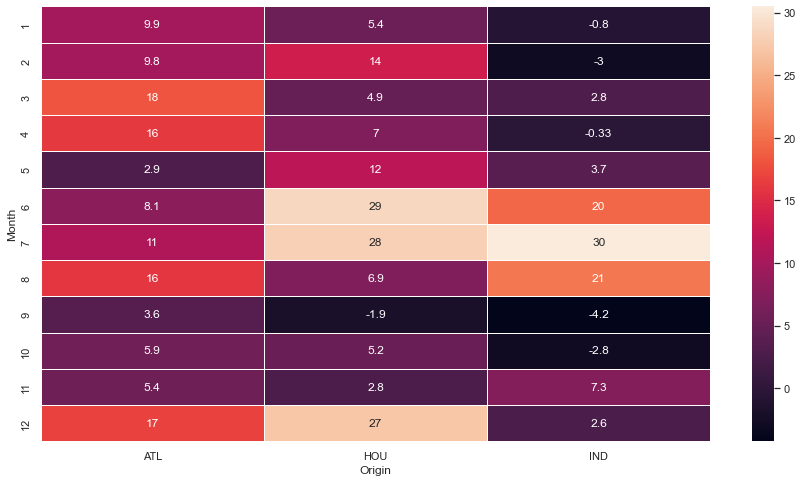

In [31]:
sns.set(rc={'figure.figsize':(15,8)}) #Ajusta el tamaño del gráfico
sns.heatmap(data = data, annot=True,linewidths=.5)

## Plotly
[Plotly](https://plotly.com/get-pricing/)